In [ ]:
#Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
print("\"",sentences[0],"\" Labelnya ",labels[0])

" former versace store clerk sues over secret 'black code' for minority shoppers " Labelnya  0


# Hyper Parameter 
variabel dibawah bisa ditunning

In [15]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 1000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

In [16]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [18]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}') # dari (10 + 1 + 1) / 3 dan (2 + 3 + 1) / 3

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


# Buat model

In [19]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            16000     
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5741 - accuracy: 0.6872 - val_loss: 0.4366 - val_accuracy: 0.7997 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3949 - accuracy: 0.8212 - val_loss: 0.4044 - val_accuracy: 0.8106 - 605ms/epoch - 969us/step
Epoch 3/30
625/625 - 1s - loss: 0.3686 - accuracy: 0.8325 - val_loss: 0.3992 - val_accuracy: 0.8129 - 588ms/epoch - 940us/step
Epoch 4/30
625/625 - 1s - loss: 0.3609 - accuracy: 0.8347 - val_loss: 0.4089 - val_accuracy: 0.8147 - 593ms/epoch - 948us/step
Epoch 5/30
625/625 - 1s - loss: 0.3563 - accuracy: 0.8371 - val_loss: 0.4014 - val_accuracy: 0.8131 - 570ms/epoch - 913us/step
Epoch 6/30
625/625 - 1s - loss: 0.3532 - accuracy: 0.8397 - val_loss: 0.4029 - val_accuracy: 0.8125 - 575ms/epoch - 920us/step
Epoch 7/30
625/625 - 1s - loss: 0.3525 - accuracy: 0.8397 - val_loss: 0.4044 - val_accuracy: 0.8146 - 579ms/epoch - 927us/step
Epoch 8/30
625/625 - 1s - loss: 0.3510 - accuracy: 0.8394 - val_loss: 0.4048 - val_accuracy: 0.8128 - 597ms/epoch - 

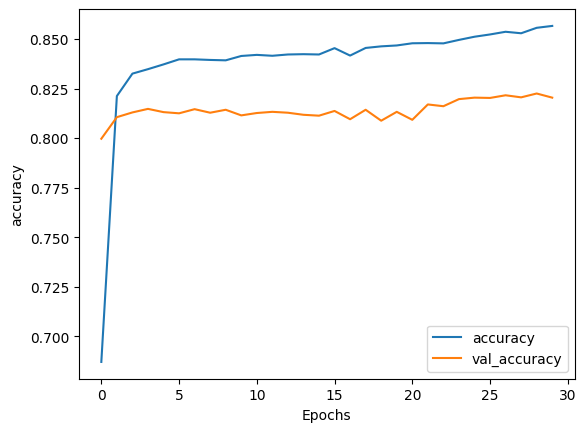

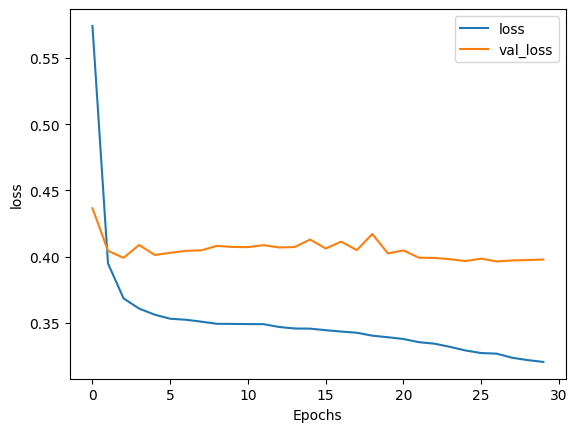

In [22]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")